# Goal :
* Data Cleaning and EDA
* Develop a model to predict demand for shared bikes
* Find the Significant Variables for the model with appropriate metrics

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
sns.set()

# Data Loading

In [3]:
!git clone "https://github.com/akshaysmin/Bike-Sharing-Demand-Prediction"

Cloning into 'Bike-Sharing-Demand-Prediction'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [6]:
path = '/content/Bike-Sharing-Demand-Prediction/shared bikes.csv'
df = pd.read_csv(path)

In [63]:
df_bikes = df.copy()

In [8]:
df_bikes.shape

(730, 16)

In [9]:
df_bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Cleaning

##Check for missing values

In [11]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


* We have no missing values
* All columns are of correct datatype

## Drop Unneccessary Columns

In [13]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
len(df_bikes['instant'].unique())

730

Conclusion : 
* instant represents unique id values for each row and can be dropped
* dteday can be dropped as we have day, year, month, etc. in other columns
* casual and registered can be dropped to avoid data leakage (casual + registered = cnt) as cnt is target variable
* temp and atemp shows very close values and need to be investigated

In [64]:
df_bikes.drop(['instant','dteday', 'casual', 'registered'], axis=1, inplace=True)
df_bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [22]:
df[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


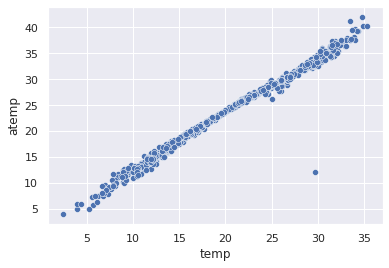

In [28]:
sns.scatterplot(data=df_bikes, x='temp', y='atemp')
plt.show()

* We can drop atemp as it is highly correlated with temp

In [65]:
df_bikes.drop('atemp', axis=1, inplace=True)
df_bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Renaming columns

In [71]:
df_bikes.rename(columns = {'season':'Season',
                           'yr':'Year',
                           'mnth':'Month',
                           'holiday':'Holiday',
                           'weekday':'Weekday',
                           'workingday':'Workingday',
                           'hum':'Humidity',
                           'windspeed': 'Windspeed',
                           'weathersit':'Weather',
                           'temp' : 'Temperature',
                           'cnt':'Count'},
                inplace=True)
df_bikes.columns

Index(['Season', 'Year', 'Month', 'Holiday', 'Weekday', 'Workingday',
       'Weather', 'Temperature', 'Humidity', 'Windspeed', 'Count'],
      dtype='object')

##Handling Categorical Variables

Season, Year, Month, Holiday, Weekday, Workingday, Weather

Year

In [73]:
df_bikes['Year'].value_counts()

0    365
1    365
Name: Year, dtype: int64

We will keep yr as it is because the years are not specified

Month

In [74]:
df_bikes['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                         ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'),
                         inplace=True
                         )

Season

In [75]:
df_bikes.groupby('Season')['Month'].value_counts()

Season  Month    
1       January      62
        February     56
        March        40
        December     22
2       May          62
        April        60
        June         40
        March        22
3       August       62
        July         62
        September    44
        June         20
4       October      62
        November     60
        December     40
        September    16
Name: Month, dtype: int64

In [76]:
df_bikes['Season'].replace((1,2,3,4),
                           ('Spring', 'Summer', 'Autumn', 'Winter'),
                           inplace=True
                          )

Weather

In [77]:
df_bikes['Weather'].value_counts()

1    463
2    246
3     21
Name: Weather, dtype: int64

In [79]:
df_bikes['Weather'].replace((1,2,3),
                            ('Good/Clear', 'Moderate/Cloudy', 'Bad/Raining'),
                           inplace=True
                           )
df_bikes['Weather'].value_counts()

Good/Clear         463
Moderate/Cloudy    246
Bad/Raining         21
Name: Weather, dtype: int64

Holiday

In [81]:
df_bikes['Holiday'].replace((0,1),
                            ('No', 'Yes'),
                            inplace=True
                            )
df_bikes['Holiday'].value_counts()

No     709
Yes     21
Name: Holiday, dtype: int64

Weekday

In [82]:
df_bikes['Weekday'].value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: Weekday, dtype: int64

In [84]:
df_bikes['Weekday'].replace((0,1,2,3,4,5,6),
                            ('Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'),
                            inplace=True
                            )
df_bikes['Weekday'].value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: Weekday, dtype: int64

In [86]:
df_bikes['Workingday'].replace((0,1),
                            ('No','Yes'),
                            inplace=True
                            )
df_bikes['Workingday'].value_counts()

Yes    504
No     226
Name: Workingday, dtype: int64

## Remove Extreme Values

In [95]:
num_cols = ['Temperature', 'Humidity', 'Windspeed', 'Count']

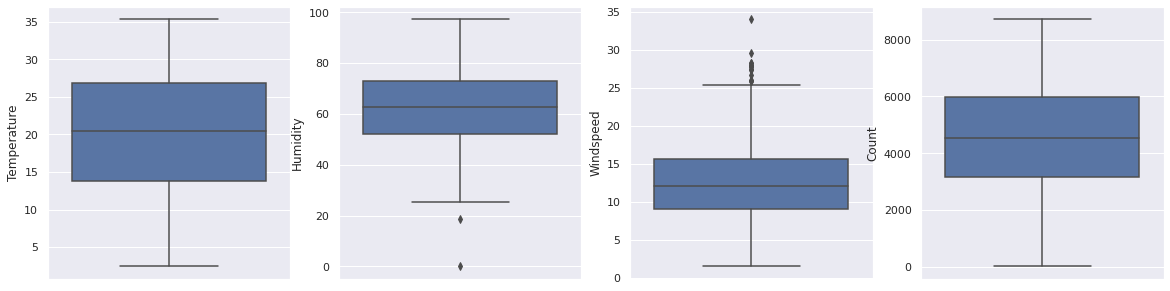

In [128]:
fig, axis = plt.subplots(1,4, figsize=(20,5))
for i,col in enumerate(num_cols):
  sns.boxplot(data=df_bikes,
              y=col,
              ax=axis[i])
plt.show()

There doesn't seem to be extreme values

# Exploratory Data Analysis

In [129]:
df_bikes.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count
0,Spring,0,January,No,Monday,Yes,Moderate/Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,January,No,Tuesday,Yes,Moderate/Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,January,No,Wednesday,Yes,Good/Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,No,Thursday,Yes,Good/Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,No,Friday,Yes,Good/Clear,9.305237,43.6957,12.522300,1600


## Count Distribution by Season

In [ ]:
df_bikes